### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import sidetable as stb


### Analisando o dataset

In [2]:
df = pd.read_csv('laptop_cleaned2.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   Name                    1020 non-null   object 
 2   Brand                   1020 non-null   object 
 3   Price                   1020 non-null   int64  
 4   Rating                  1020 non-null   float64
 5   Processor_brand         1020 non-null   object 
 6   Processor_name          1020 non-null   object 
 7   Processor_variant       996 non-null    object 
 8   Processor_gen           891 non-null    float64
 9   Core_per_processor      1008 non-null   float64
 10  Total_processor         573 non-null    float64
 11  Execution_units         573 non-null    float64
 12  Low_Power_Cores         1020 non-null   float64
 13  Energy_Efficient_Units  1020 non-null   int64  
 14  Threads                 972 non-null    

In [5]:
df.stb.missing()

,missing,total,percent
Graphics_GB,652,1020,63.921569
Total_processor,447,1020,43.823529
Execution_units,447,1020,43.823529
Processor_gen,129,1020,12.647059
Threads,48,1020,4.705882
Processor_variant,24,1020,2.352941
RAM_type,22,1020,2.156863
Core_per_processor,12,1020,1.176471
Graphics_integreted,2,1020,0.196078
Graphics_brand,2,1020,0.196078


Eliminando colunas que não serão usadas

In [6]:
df = df.drop(columns=['Unnamed: 0', 'Name', 'Graphics_name', 'Processor_name', 'Graphics_GB'])

Substituindo os valores númericos nulos pela mediana

In [7]:
df = df.fillna(df.median())

C:\Users\vilar\AppData\Local\Temp\ipykernel_23508\3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


Dividindo entre colunas categoricas e númericas

In [8]:
cat_col=df.select_dtypes(exclude="number").columns.to_list()
num_col=[col for col in df if col not in cat_col]

In [9]:
cat_col = [
    'Brand',
    'Processor_brand',
    'Processor_variant',
    'RAM_type',
    'Storage_type',
    'Graphics_brand',
    'Graphics_integreted',
    #'Touch_screen',
    'Operating_system'
]

In [10]:
num_col = [
    'Price',
    'Rating',
    'Processor_gen',
    'Core_per_processor',
    'Total_processor',
    'Execution_units',
    'Low_Power_Cores',
    'Energy_Efficient_Units',
    'Threads',
    'RAM_GB',
    'Storage_capacity_GB',
    'Display_size_inches',
    'Horizontal_pixel',
    'Vertical_pixel',
    'ppi'    
]

In [11]:
df['Touch_screen'].value_counts()

False    904
True     116
Name: Touch_screen, dtype: int64

In [12]:
df['Touch_screen'] = df['Touch_screen'].replace({'True': 1, 'False': 0})

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Fazendo o OneHot da coluna das Marcas 

In [14]:
label_enconder = LabelEncoder()
labels_brand = label_enconder.fit_transform(df.Brand)

one_hot_enconder = OneHotEncoder()
feature_arr = one_hot_enconder.fit_transform(df[['Brand']]).toarray()
feature_labels = list(label_enconder.classes_)
features = pd.DataFrame(feature_arr,columns=feature_labels)
df = pd.concat([df,features],axis=1)
df

,Brand,Price,Rating,Processor_brand,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,...,Primebook,Razer,Samsung,Tecno,Ultimus,Walker,Wings,Xiaomi,Zebronics,iBall
0,HP,50399,4.30,AMD,5600H,5.0,6.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Lenovo,26690,4.45,AMD,7320U,7.0,4.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HP,37012,4.65,Intel,1215U,12.0,6.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Samsung,69990,4.75,Intel,1240P,12.0,12.0,4.0,8.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tecno,23990,4.25,Intel,1115G4,11.0,2.0,4.0,8.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,MSI,247999,4.45,Intel,13900H,13.0,14.0,6.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,MSI,292990,4.20,Intel,13900H,13.0,14.0,6.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,HP,58800,4.40,AMD,5600H,5.0,6.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,Asus,54999,4.25,AMD,7530U,7.0,6.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fazendo o OneHot da coluna dos Sistemas Operacionais

In [15]:
label_enconder = LabelEncoder()
labels_brand = label_enconder.fit_transform(df.Operating_system)

one_hot_enconder = OneHotEncoder()
feature_arr = one_hot_enconder.fit_transform(df[['Operating_system']]).toarray()
feature_labels = list(label_enconder.classes_)
features = pd.DataFrame(feature_arr,columns=feature_labels)
df = pd.concat([df,features],axis=1)
df

,Brand,Price,Rating,Processor_brand,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,...,DOS OS,Linux OS,Mac 10.15.3\t OS,Mac Catalina OS,Mac OS,Prime OS,Ubuntu OS,Windows 10 OS,Windows 11 OS,jio
0,HP,50399,4.30,AMD,5600H,5.0,6.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Lenovo,26690,4.45,AMD,7320U,7.0,4.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,HP,37012,4.65,Intel,1215U,12.0,6.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Samsung,69990,4.75,Intel,1240P,12.0,12.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Tecno,23990,4.25,Intel,1115G4,11.0,2.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,MSI,247999,4.45,Intel,13900H,13.0,14.0,6.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1016,MSI,292990,4.20,Intel,13900H,13.0,14.0,6.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1017,HP,58800,4.40,AMD,5600H,5.0,6.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1018,Asus,54999,4.25,AMD,7530U,7.0,6.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Começando o modelo de treino


In [16]:
df_novo = df.drop(columns=cat_col)

In [17]:
df_novo

,Price,Rating,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,...,DOS OS,Linux OS,Mac 10.15.3\t OS,Mac Catalina OS,Mac OS,Prime OS,Ubuntu OS,Windows 10 OS,Windows 11 OS,jio
0,50399,4.30,5.0,6.0,4.0,8.0,0.0,0,12.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26690,4.45,7.0,4.0,4.0,8.0,0.0,0,8.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37012,4.65,12.0,6.0,2.0,4.0,0.0,0,8.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,69990,4.75,12.0,12.0,4.0,8.0,0.0,0,16.0,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,23990,4.25,11.0,2.0,4.0,8.0,0.0,0,4.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,247999,4.45,13.0,14.0,6.0,8.0,0.0,0,20.0,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1016,292990,4.20,13.0,14.0,6.0,8.0,0.0,0,20.0,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1017,58800,4.40,5.0,6.0,4.0,8.0,0.0,0,12.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1018,54999,4.25,7.0,6.0,4.0,8.0,0.0,0,12.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error



In [19]:
X = df_novo.drop(columns=['Price'])
y = df_novo['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [21]:
model = DecisionTreeRegressor(random_state=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [22]:
y_pred = model.predict(X_test)
y_pred

array([ 52400. ,  69990. ,  64990. ,  14990. ,  79999. ,  58990. ,
        54559. ,  63990. ,  43990. ,  86990. ,  29990. ,  56990. ,
        22500. ,  48990. ,  29990. ,  39990. ,  43400. ,  54990. ,
        26990. ,  76600. ,  25580. ,  54440. , 102900. , 132190. ,
       145990. ,  26990. ,  46990. ,  73882. ,  31899. ,  92990. ,
       116190. ,  54440. ,  72000. ,  53990. ,  53990. , 175999. ,
        28190. ,  33994. ,  62190. ,  52850. ,  56990. ,  48899. ,
        35990. , 329990. ,  79990. ,  53890. , 109990. ,  97990. ,
        72990. , 142190. ,  50490. ,  50000. ,  52990. ,  74990. ,
       108999. ,  59990. ,  81990. ,  32990. , 152499. ,  32971. ,
        60499. , 109990. ,  39990. , 114990. ,  46938. ,  34980. ,
        16490. ,  33990. ,  48990. ,  26100. ,  92990. , 146990. ,
        76990. ,  54859. ,  35490. ,  54440. ,  73990. ,  90990. ,
        46990. ,  83449. ,  58990. ,  47450. ,  31890. , 134990. ,
        48990. ,  37990. ,  79990. ,  47450. ,  84490. , 10199

In [23]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(
f"""
Usando Decision Three Regression

R² = {r2}
MSE = {mse}
MAE = {mae}
""")



Usando Decision Three Regression

R² = 0.7491815181282406
MSE = 860793341.432598
MAE = 17129.448529411766



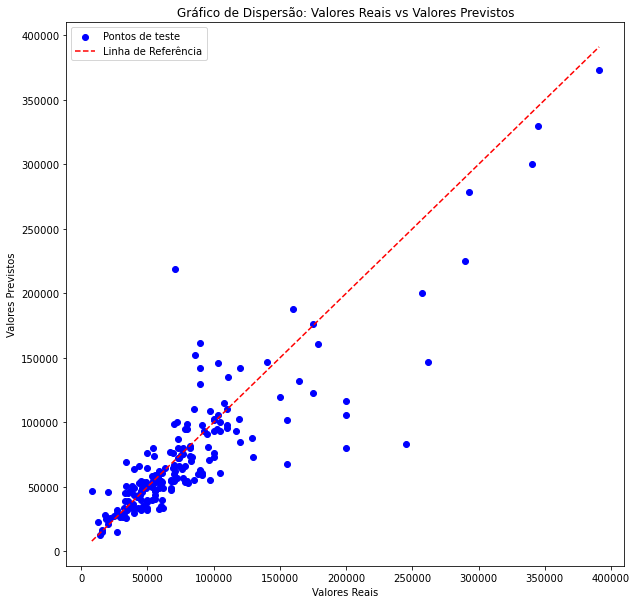

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, color='blue', label='Pontos de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs Valores Previstos')
plt.legend()
plt.show()

### Modelo sem normalização

In [25]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)


In [26]:
r2_2 = r2_score(y_test, y_pred2)
mse_2 = mean_squared_error(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)

print(
f"""
Usando Linear Regression (Sem Normalização)

R² = {r2_2}
MSE = {mse_2}
MAE = {mae_2}
""")


Usando Linear Regression (Sem Normalização)

R² = 0.8102802671911545
MSE = 651106256.2914486
MAE = 17342.799781637797



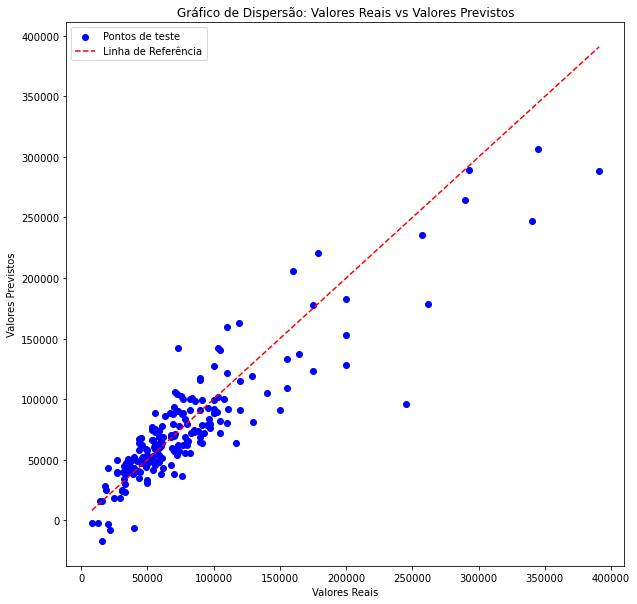

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred2, color='blue', label='Pontos de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs Valores Previstos')
plt.legend()
plt.show()

### Com normalização

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)


In [30]:
r2_3 = r2_score(y_test, y_pred3)
mse_3 = mean_squared_error(y_test, y_pred3)
mae_3 = mean_absolute_error(y_test, y_pred3)

print(
f"""
Usando Linear Regression (Com Normalização)

R² = {r2_3}
MSE = {mse_3}
MAE = {mae_3}
""")


Usando Linear Regression (Com Normalização)

R² = -7.687553919683456e+22
MSE = 2.6383204206422827e+32
MAE = 1893360154804059.2



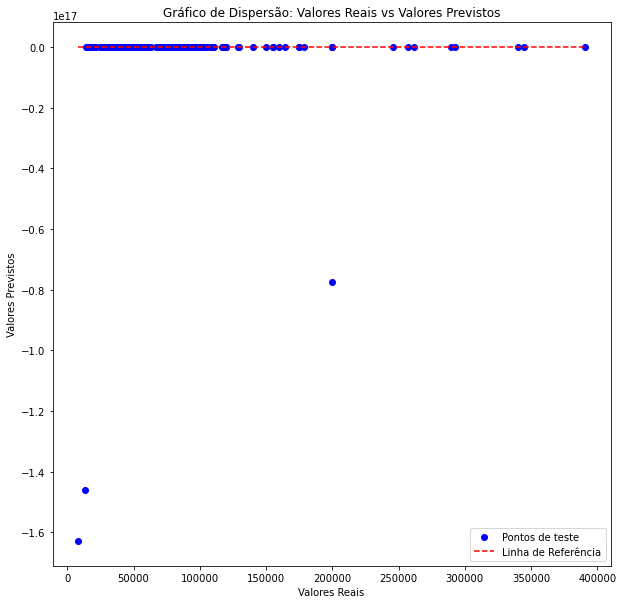

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred3, color='blue', label='Pontos de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs Valores Previstos')
plt.legend()
plt.show()

Fazendo um boxplot da coluna de Preço

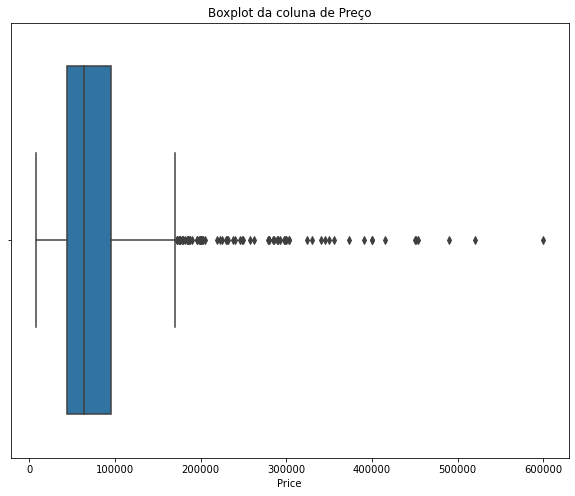

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Price'])
plt.title("Boxplot da coluna de Preço")

plt.show()

## Fazendo o KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
model_KNN = KNeighborsRegressor(n_neighbors=10, metric='euclidean').fit(X_train, y_train)
model_KNN
y_pred_knn = model_KNN.predict(X_test)


In [35]:
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(
f"""
KNN 

R² = {r2_knn}
MSE = {mse_knn}
MAE = {mae_knn}
""")


KNN 

R² = 0.725896398379458
MSE = 940706415.9581864
MAE = 17737.099509803924



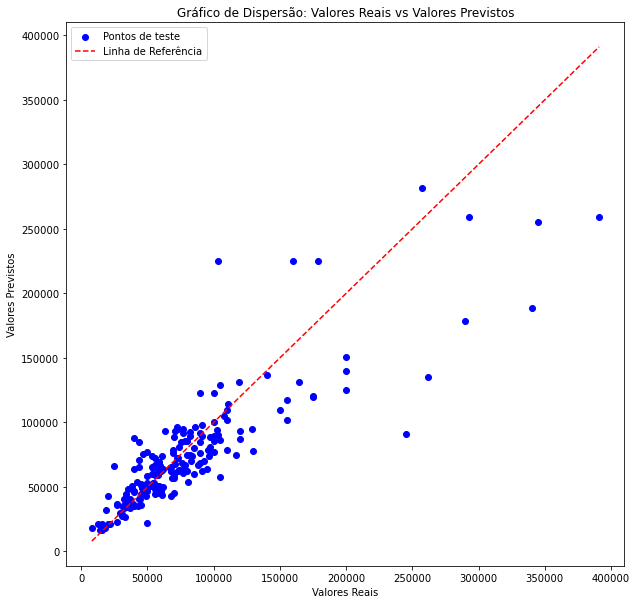

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_knn, color='blue', label='Pontos de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs Valores Previstos')
plt.legend()
plt.show()

### Random Florest - Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

In [38]:
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(
f"""
KNN 

R² = {r2_rf}
MSE = {mse_rf}
MAE = {mae_rf}
""")


KNN 

R² = 0.8284549520427423
MSE = 588731874.6823548
MAE = 14084.308617355277



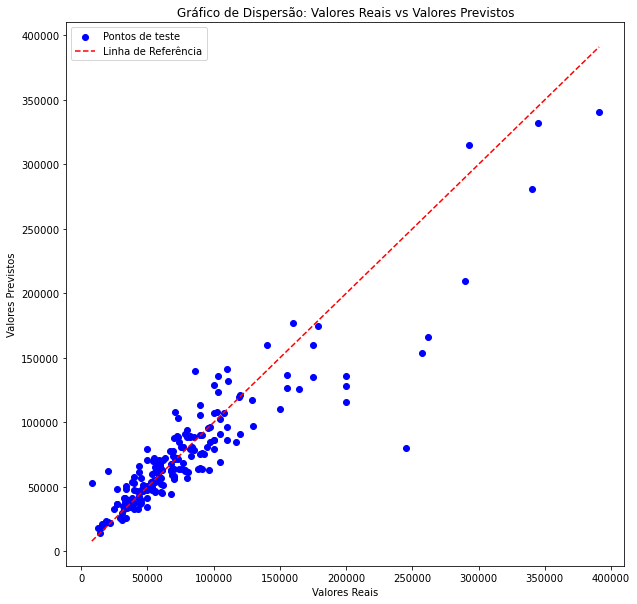

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_rf, color='blue', label='Pontos de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs Valores Previstos')
plt.legend()
plt.show()